# Diabetes
If you are using Jupyter Notebook
- conda install tensorflow
- conda install graphviz
- conda install pydot

Features
- Pregnancies: Number of times pregnant                                             
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
- BloodPressure: Diastolic blood pressure (mm Hg)                                   
- SkinThickness: Triceps skin fold thickness (mm)                                    
- Insulin: 2-Hour serum insulin (mu U/ml)                                            
- BMI: Body mass index (weight in kg/(height in m)^2)                               
- DiabetesPedigreeFunction: Diabetes pedigree function                     
- Age: Age (years)                                                                 
- Outcome: Class variable (0 or 1)                                                  
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

## Importing Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Observing the Dataset

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Data Visualization

### Functions

In [7]:
def histplot_and_boxplot(feature):
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    ax = sns.histplot(x = feature,data = df)
    ax.bar_label(ax.containers[0],size = 13)
    plt.xlabel(feature.title(),size = 16)
    plt.xticks(size = 14)
    plt.ylabel('Count',size = 16)
    plt.yticks(size = 14)
    plt.title('Distribution of '+feature.title(),size = 18,y = 1.05)

    plt.subplot(1,2,2)
    sns.boxplot(x = 'Outcome',y = feature,data = df,palette = 'seismic')
    plt.xlabel('Outcome',size = 16)
    plt.xticks(size = 14)
    plt.ylabel(feature,size = 16)
    plt.yticks(size = 14)

    plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
    plt.show()

In [8]:
def jointplot(x_feature,y_feature):
    sns.jointplot(x = x_feature,y = y_feature,data = df,hue = 'Outcome',palette = 'seismic')
    plt.title(y_feature.title()+' - '+x_feature.title(),size = 18,y = 1.3,x = -3)

In [9]:
def scatterplot(x_feature,y_feature,x_label,y_label):
    sns.scatterplot(x = x_feature,y = y_feature,hue = 'Outcome',data = df,hue_order=[1,0],palette = 'Set1')
    plt.xticks(size = 13)
    plt.yticks(size = 13)
    plt.xlabel(x_label,size = 14)
    plt.ylabel(y_label,size = 14)
    plt.title(y_label + ' - '+ x_label,size = 16,y = 1.05)

### Seamap

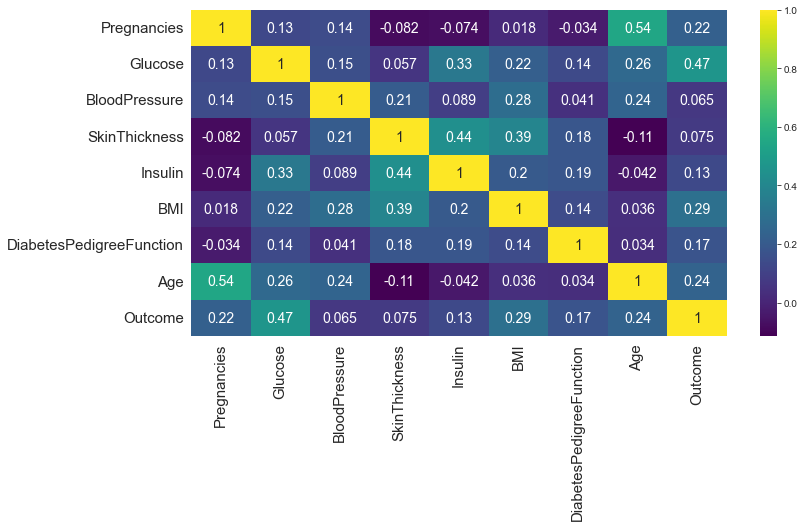

In [10]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True,cmap = 'viridis',annot_kws={'size':14 })
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Outcome

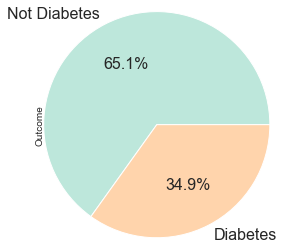

In [11]:
df['Outcome'].value_counts().plot.pie(autopct = "%.1f%%", startangle = 0, radius = 1.3,textprops={'fontsize': 16},
                                     cmap = 'icefire',labels = ['Not Diabetes','Diabetes'])
plt.show()

### Glucose

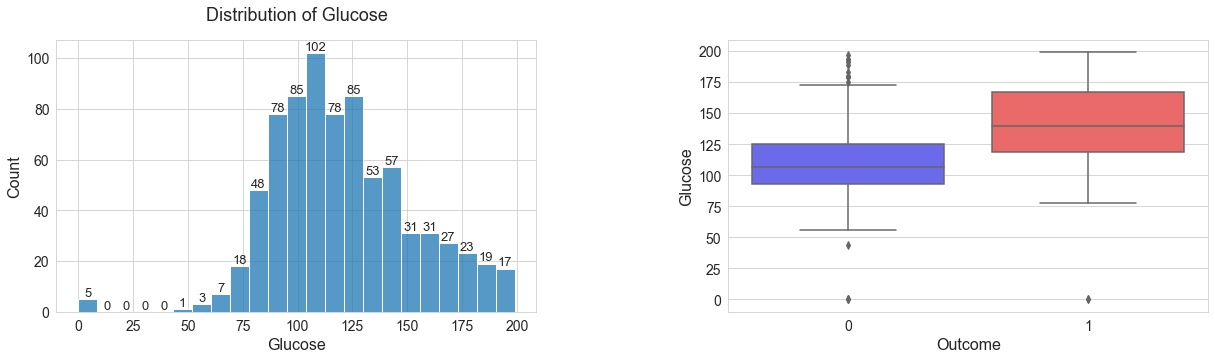

In [12]:
histplot_and_boxplot('Glucose')

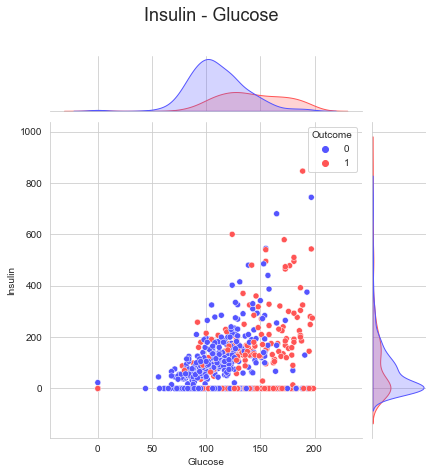

In [13]:
jointplot(x_feature='Glucose',y_feature='Insulin')

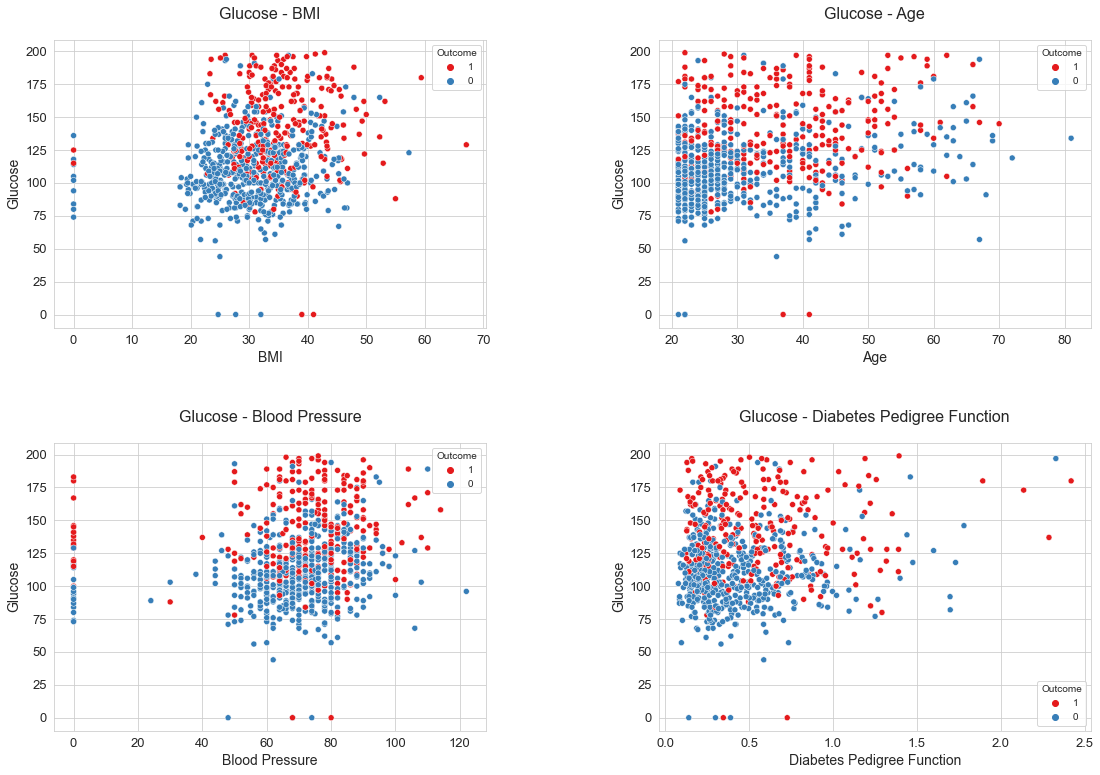

In [14]:
plt.figure(figsize = (18,12))

plt.subplot(2,2,1)
scatterplot('BMI','Glucose','BMI','Glucose')

plt.subplot(2,2,2)
scatterplot('Age','Glucose','Age','Glucose')


plt.subplot(2,2,3)
scatterplot('BloodPressure','Glucose','Blood Pressure','Glucose')

plt.subplot(2,2,4)
scatterplot('DiabetesPedigreeFunction','Glucose','Diabetes Pedigree Function','Glucose')

plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4,top = 0.9,bottom = 0.1)
plt.show()

### BMI

- Underweight   : < 18.5
- Normal weight : 18.5–24.9
- Overweight    : 25–29.9
- Obesity       : 30 or greater

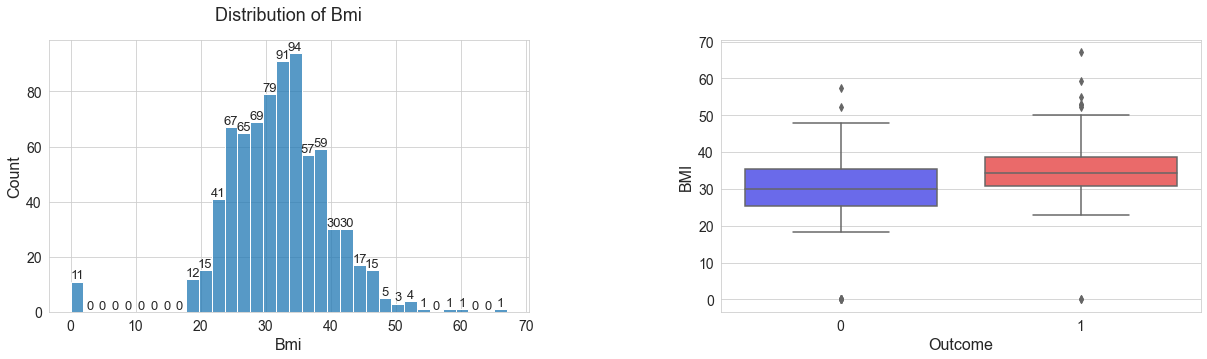

In [15]:
histplot_and_boxplot('BMI')

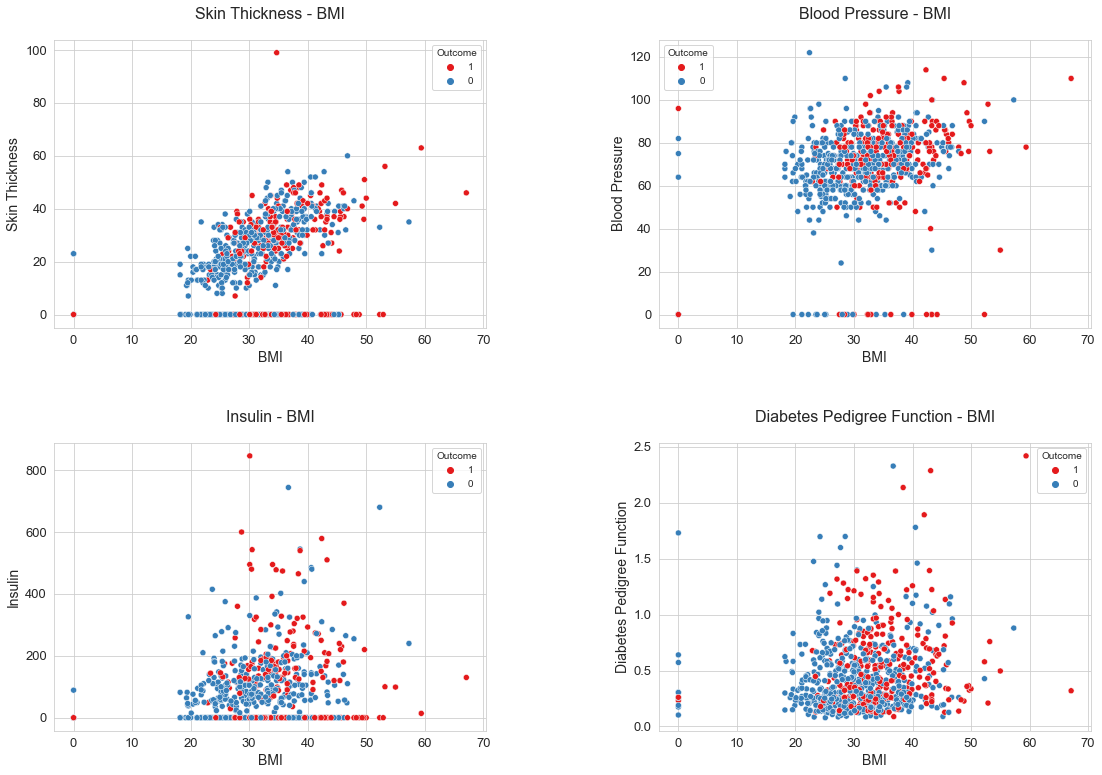

In [16]:
plt.figure(figsize = (18,12))

plt.subplot(2,2,1)
scatterplot('BMI','SkinThickness','BMI','Skin Thickness')

plt.subplot(2,2,2)
scatterplot('BMI','BloodPressure','BMI','Blood Pressure')

plt.subplot(2,2,3)
scatterplot('BMI','Insulin','BMI','Insulin')

plt.subplot(2,2,4)
scatterplot('BMI','DiabetesPedigreeFunction','BMI','Diabetes Pedigree Function')

plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4,top = 0.9,bottom = 0.1)
plt.show()

### Age

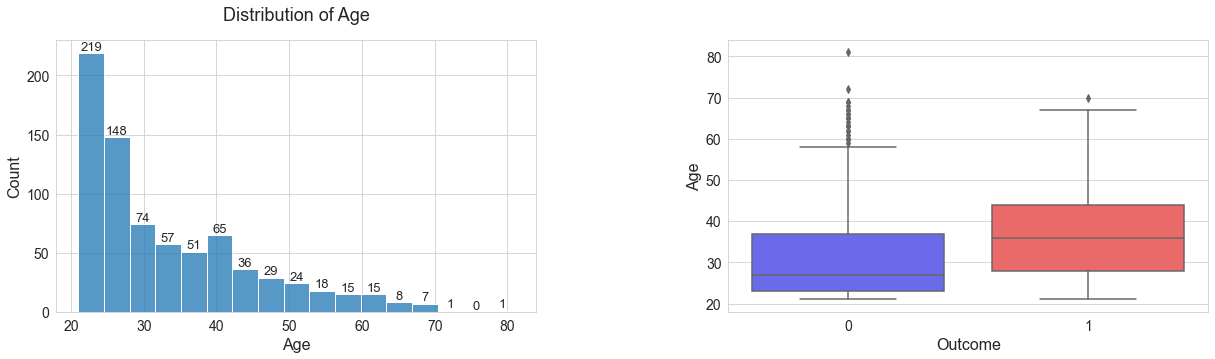

In [17]:
histplot_and_boxplot('Age')

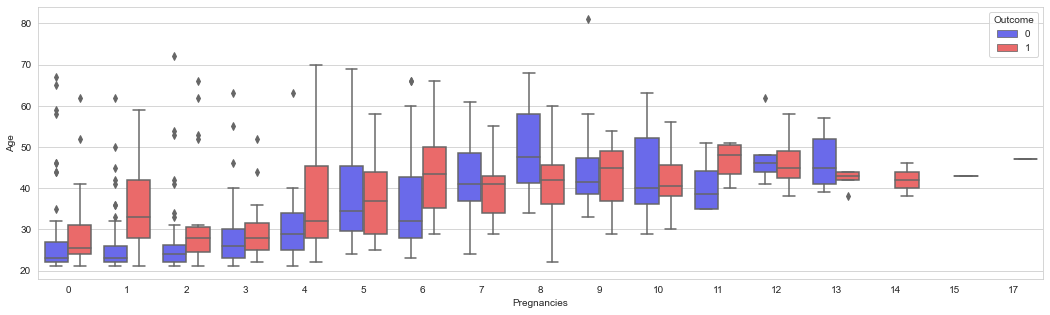

In [18]:
plt.figure(figsize = (18,5))
sns.boxplot(x = 'Pregnancies',y = 'Age',hue = 'Outcome',palette = 'seismic',data = df)
plt.show()

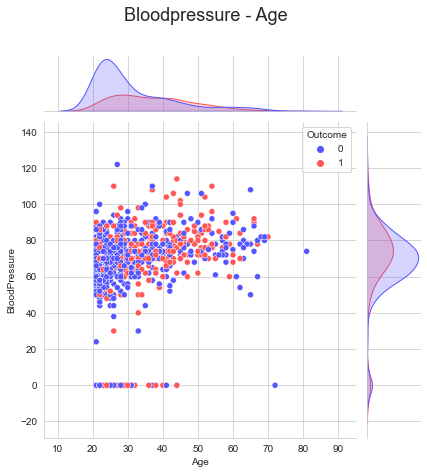

In [19]:
jointplot(x_feature='Age',y_feature='BloodPressure')

### Pregnancies

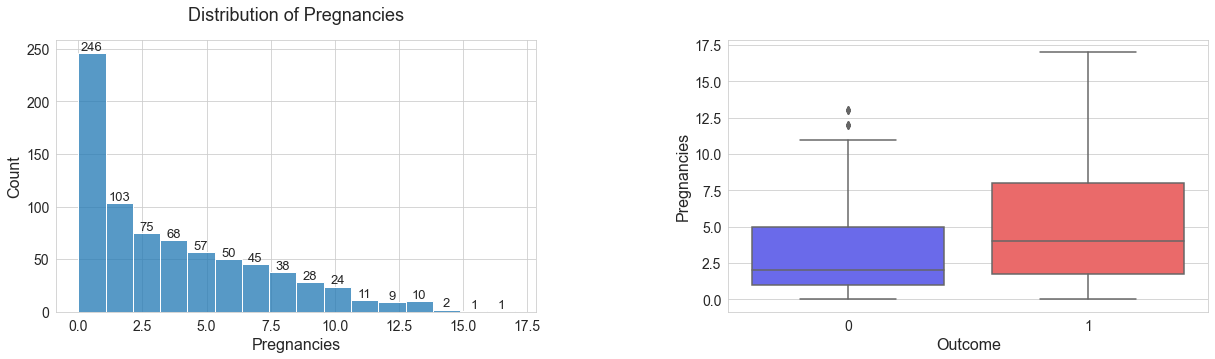

In [20]:
histplot_and_boxplot('Pregnancies')

### Diabetes Pedigree Function

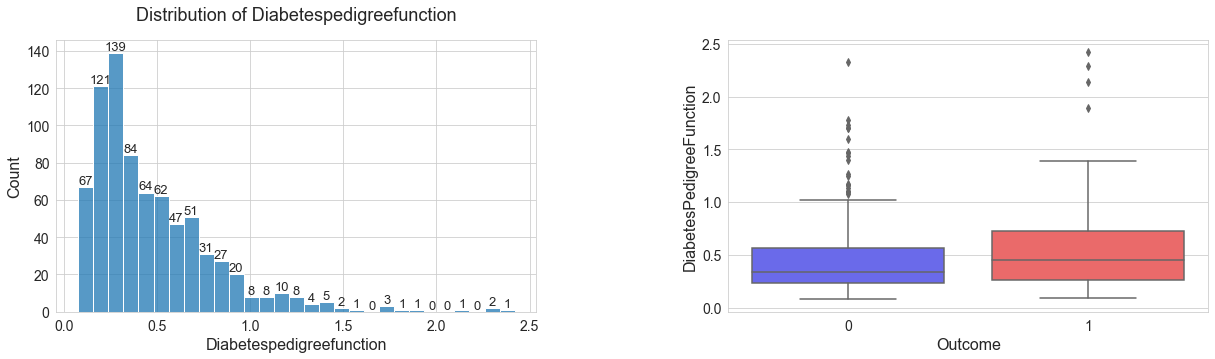

In [21]:
histplot_and_boxplot('DiabetesPedigreeFunction')

### Insulin

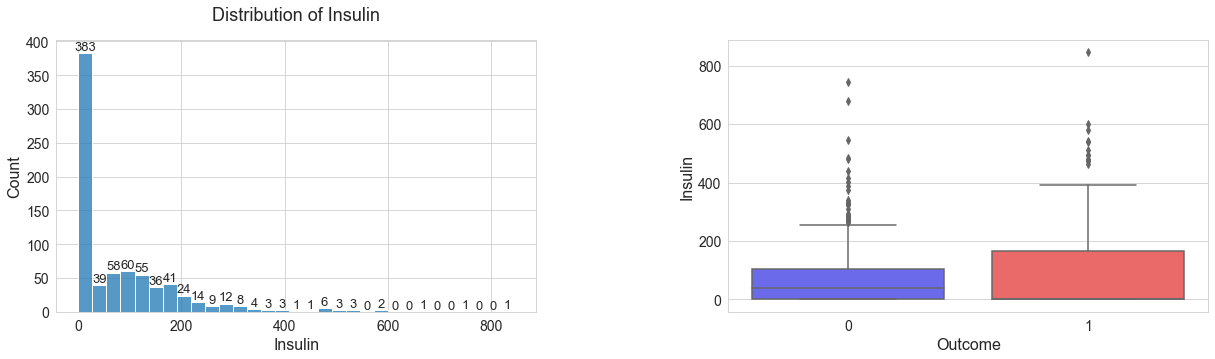

In [22]:
histplot_and_boxplot('Insulin')

## Data Preprocessing

### Create Independent and Dependent Variables

In [23]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Split the Variables into the Train Set and Test Set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Scale the Variables

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating Artificial Neural Network Model

### Libraries

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

### Creat the Model

In [28]:
model = Sequential()

model.add(Dense(units=8,activation='relu'))
model.add(Dropout(rate = 0.4))

model.add(Dense(units=8,activation='relu'))
model.add(Dropout(rate = 0.4))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

### Fit the Model

In [29]:
early_stopping = EarlyStopping(mode = 'min',verbose=1,patience=10)

In [30]:
model.fit(x=X_train,y = y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.8064 - val_loss: 0.6636
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7602 - val_loss: 0.6473
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7377 - val_loss: 0.6357
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7075 - val_loss: 0.6255
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6928 - val_loss: 0.6154
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6854 - val_loss: 0.6075
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6834 - val_loss: 0.6008
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6631 - val_loss: 0.5955
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6494 - val_loss: 0.5884
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6682 - val_loss: 0.5828
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.5340 - val_loss: 0.4729
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4996 - val_loss: 0.4700
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5399 - val_loss: 0.4694
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5359 - val_loss: 0.4693
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5444 - val_loss: 0.4691
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5270 - val_loss: 0.4684
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5414 - val_loss: 0.4675
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5307 - val_loss: 0.4671
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5344 - val_loss: 0.4673
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5265 - val_loss: 0.4670
Epoch 93/100


<AxesSubplot:>

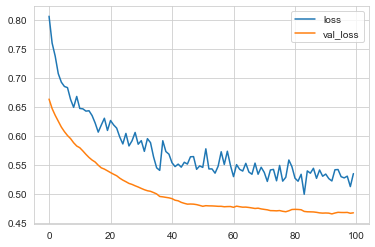

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Plotting Model

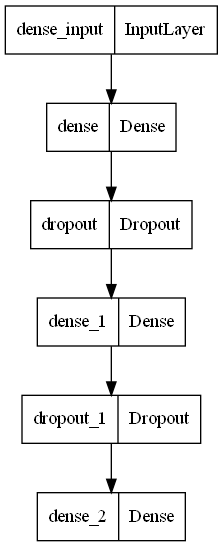

In [32]:
plot_model(model,to_file='model.png')

## Result

In [33]:
y_pred = (model.predict(X_test) > 0.5).astype('int32')

5/5 [==============================] - 0s 3ms/step


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       107
           1       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



In [35]:
print(confusion_matrix(y_test,y_pred))

[[97 10]
 [20 27]]


In [36]:
acc = round(accuracy_score(y_test,y_pred),3)
precision = round(precision_score(y_test,y_pred),3)
recall = round(recall_score(y_test,y_pred),3)

print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

Accuracy: 0.805
Precision: 0.73
Recall: 0.574


## Predict a Single Value

In [37]:
# df.describe().transpose()

In [38]:
# predictions = [[your_predictions_of_each_columns]]
# predictions = sc.transform(predictions)

# model_predict = (model.predict(predictions)[0][0] > 0.5).astype('int32')

# print('\nResult: ',model_predict)

## Save / Load Machine Learning Model

In [39]:
# from keras.models import load_model

### Save

In [40]:
# try:
#     model.save('my_model.h5')  
#     print('Model Saved')
# except Exception as ex:
#     print(ex)

### Load

In [41]:
# try:
#     my_model = load_model('my_model.h5')
#     print('Model Loaded')
# except Exception as ex:
#     print(ex)